# Grupo 5 - Sistemas Inteligentes

<b>Nomes:</b>

<br>

Dimitri Leandro de Oliveira Silva                                            RA: 11201720576

Daniel Vieira Batista                                                              RA: 11106614

Gabriel Fernandes                                                                  RA: 11048816

Yan Podkorytoff Ike Chícharo                                                       RA: 21068214

# PERCEPTRON

## Configurações Iniciais

Pacotes que serão usados para tratamento dos vetores, plotar gráficos, gerar valores inteiros aleatórios, importação do *dataset*, separação dos dados em treinamento e teste, método de classificação *Perceptron* e as métricas para análise de desempenho.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn import datasets
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import Perceptron
import warnings
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

Pré configurando parâmetros de exibição de gráficos e outros.

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')

params = {'figure.figsize': [7, 4], 
          'axes.labelsize': 12,
          'axes.titlesize':16, 
          'font.size': 12,
          'legend.fontsize': 12, 
          'xtick.labelsize': 10, 
          'ytick.labelsize': 10
         }

plt.rcParams.update(params)

## Dataset

Importação do dataset *Breast Cancer Wisconsin*.

In [12]:
dataset = datasets.load_breast_cancer()

Atribuição dos dados de entrada a variável X e dos elementos *target* a variável y.

Obs.: O elemento *target* do dataset é distribuído em valores 0 e 1, onde 0 representa o diagnóstico de câncer benigno e 1 o câncer maligno.

In [13]:
x = dataset.data
y = dataset.target

Imprimindo o formato de ambas variáveis geradas.

In [14]:
x.shape

(569, 30)

In [15]:
y.shape

(569,)

## Perceptron Implementado pela equipe

A célula abaixo contém a classe do Perceptron implementado pela equipe, o algoritmo está dividido em uma classe que conta com diferentes funções: "predizerDado", "calcularAcuracia", "treinarPesos", "treinarPerceptron" e "predizerDados". Tal que cada função implementada realiza um passo do algoritmo da seguinte forma:

- predizerDado: Faz a predição do dado em questão considerando seu vetor de pesos, retorna "classe 1" se a soma do valor do dado em questão multiplicado pelo seu peso é maior que zero, e "classe 0" caso contrário.

- calcularAcuracia: Compara o número de acertos entre os valores preditos e os valores esperados e retorna a porcentagem de acertos, ou acurácia.

- treinarPesos: Módulo de treinamento de dado individual da nossa implementação, analisa um dado e treina de modo a reduzir o erro entre a predição e o valor esperado.

- treinarPerceptron: Função de treinamento da nossa implementação, recebe todos os dados e envia um a um para a função "treinarPesos" para treinamento.

- predizerDados: Função de predição da nossa implementação, recebe todos os dados e envia um a um para a função "predizerDado" para predição.

Obs.: O grupo decidiu manter o código comentado abaixo de forma que o leitor possa acompanhar o sentido de cada módulo do código, dado que desempenha função citada acima.



In [16]:
class PerceptronImplementado:        
    
    def predizerDado(self, dado):        
        # Temos que ir somando cada dimensão do dado de entrada com o respectivo peso
        soma = 0.0
        
        # Passando por cada dimensão e somando as multiplicações
        for valorDadoDimensao, pesoDimensao in zip(dado, self.vetorPesos):
            soma += valorDadoDimensao * pesoDimensao

        # Retorna classe 1 se a soma der >= 0 e classe 0 caso contrário
        if soma >= 0:
            return 1
        else:
            return 0
        
    def calcularAcuracia(self, x, y):
        
        qtdAcertos = 0

        # Passando por cada dado para predizer sua classe e comparar com a real
        for dadoAtual, classeReal in zip(x, y):

            # Fazendo a predição
            classePredita = self.predizerDado(dadoAtual)

            # Se acertamos, então somo 1 em qtdAcertos
            if classePredita == classeReal:
                qtdAcertos += 1

        # Retornamos a porcentagem de acertos
        return qtdAcertos / float(len(x))

        
    def treinarPesos(self, x, y, qtdMaxIteracoes = 10000, taxaAprendizagem = 0.5):
        
        # Iremos alterar o valor dos pesos no máximo qtdMaxIteracoes vezes
        for i in range(qtdMaxIteracoes):

            # Primeiro calculamos a acurácia atual para ver se já podemos parar o algoritmo
            acuraciaAtual = self.calcularAcuracia(x, y)

            # Se já chegamos em 100%, então podemos parar as iterações
            if acuraciaAtual == 1:
                break

            # Senão, passaremos por cada dado para fazer a predição, calcular o erro e arrumar os pesos
            for dadoAtual, classeReal in zip(x, y):

                # Fazendo a predição e calculando o erro
                classePredita = self.predizerDado(dadoAtual)
                erro = classeReal - classePredita

                # Se houve erro, então recalculamos todos os pesos
                if erro != 0:
                    for index, pesoAtual in enumerate(self.vetorPesos):
                        self.vetorPesos[index] = pesoAtual + taxaAprendizagem * erro * dadoAtual[index]
    
    
    def treinarPerceptron(self, xTrain, yTrain, qtdMaxIteracoes = 10000, taxaAprendizagem = 0.5):
        # Transformando tudo pra numpy (assim funciona com datasets reais)
        xTrain = np.array(xTrain)
        yTrain = np.array(yTrain)
        
        # A primeira coisa a fazer é colocar o bias no final de cada dado
        for dadoAtual in xTrain:
            np.append(dadoAtual, 1)
        
        # Começando com pesos aleatórios entre -1 e 1 e fazendo o treinamento
        self.vetorPesos = []

        # Pesos aleatórios para cada dimensão
        for i in range(len(xTrain[0])):
            self.vetorPesos.append(randint(-1000, 1000) / 1000)

        # Treinando
        self.treinarPesos(xTrain, yTrain, qtdMaxIteracoes, taxaAprendizagem)
        
    
    def predizerDados(self, xTest):
        # Transformando tudo pra numpy (assim funciona com datasets reais)
        xTest = np.array(xTest)
        
        # Essa função faz a predição de n dados usando a função predizerDado (atenção no plural e singular)
        yPred = []
        
        for dadoAtual in xTest:
            # Temos que colocar o bias no final
            np.append(dadoAtual, 1)
            yPred.append(self.predizerDado(dadoAtual))
            
        return yPred

## Usando K-Fold Cross Validation para analisar o algoritmo implementado e o do Sklearn

Antes de fazer as comparações, é de extrema importância manter os parâmetros do algoritmo implementado e os do Sklearn iguais. A célula abaixo contém os parâmetros em comum dos dois códigos.

In [17]:
# Para os perceptrons
taxaAprendizagem = 0.5
maxIteracoes = 1000

# Para o KFold
qtdPacotesKFold = 10

Abaixo temos a execução de ambos algoritmos, implementado pelo Sklearn e implementado por nossa equipe de forma que guardamos em um vetor cada métrica que será analisada futuramente.

In [18]:
objPerceptronImplementado = PerceptronImplementado()
objPerceptronSklearn = Perceptron(eta0=taxaAprendizagem, max_iter=maxIteracoes)

#Instânciando um objeto KFold com 10 pacotes
objKFold = KFold(n_splits = qtdPacotesKFold, shuffle=True)

#Vetores de métricas para o algoritmo implementado
vetorAcuraciasImplementado = []
vetorF1Implementado = []
vetorPrecisaoImplementado = []
vetorRecallImplementado = []

#Vetores de métricas para o algoritmo do sklearn
vetorAcuraciasSklearn = []
vetorF1Sklearn = []
vetorPrecisaoSklearn = []
vetorRecallSklearn = []

#Rodando o Perceptron com o KFold
i = 0
for trainIndex, testIndex in objKFold.split(x):
    
    # Separando os dados de treinamento e teste
    i += 1
    xTrain, xTest, yTrain, yTest = x[trainIndex], x[testIndex], y[trainIndex], y[testIndex]
    
    # Treinando o perceptron implementado e o do sklearn
    objPerceptronImplementado.treinarPerceptron(xTrain, yTrain, qtdMaxIteracoes=maxIteracoes)
    objPerceptronSklearn.fit(xTrain, yTrain)
    
    # Predizendo os dados de teste
    yPredImplementado = objPerceptronImplementado.predizerDados(xTest)
    yPredSklearn = objPerceptronSklearn.predict(xTest)
    
    # Verificando métricas no algoritmo implementado
    vetorAcuraciasImplementado.append(accuracy_score(yTest, yPredImplementado))
    vetorF1Implementado.append(f1_score(yTest, yPredImplementado, average='binary'))
    vetorPrecisaoImplementado.append(precision_score(yTest, yPredImplementado, average='binary'))
    vetorRecallImplementado.append(recall_score(yTest, yPredImplementado, average='binary'))
    
    # Verificando metricas no Sklearn
    vetorAcuraciasSklearn.append(accuracy_score(yTest, yPredSklearn))
    vetorF1Sklearn.append(f1_score(yTest, yPredSklearn, average='binary'))
    vetorPrecisaoSklearn.append(precision_score(yTest, yPredSklearn, average='binary'))
    vetorRecallSklearn.append(recall_score(yTest, yPredSklearn, average='binary'))
    
    print("Iteração", i, "finalizada")

Iteração 1 finalizada
Iteração 2 finalizada
Iteração 3 finalizada
Iteração 4 finalizada
Iteração 5 finalizada
Iteração 6 finalizada
Iteração 7 finalizada
Iteração 8 finalizada
Iteração 9 finalizada
Iteração 10 finalizada


## Analisando as Métricas

Conforme citado anteriormente as métricas que serão analisadas serão a acurácia, "*F1 Score*", precisão e "*Recall*", plotando os gráficos que representam a média do desempenho de ambas implementações através das execuções.

### Acurácia

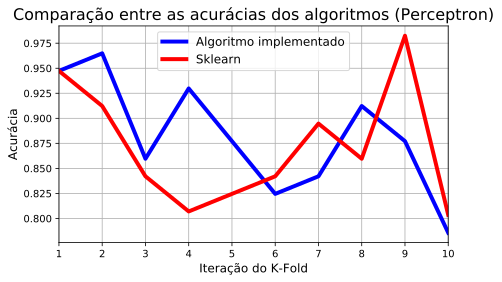

Acurácia média do algoritmo implementado: 0.8820802005012531
Acurácia média do Perceptron do Sklearn: 0.8715852130325814


In [19]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorAcuraciasImplementado, color="blue", linewidth=4, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorAcuraciasSklearn, color="red", linewidth=4, label="Sklearn")
plt.title("Comparação entre as acurácias dos algoritmos (Perceptron)")
plt.xlabel("Iteração do K-Fold")
plt.ylabel("Acurácia")
plt.xlim(1,qtdPacotesKFold)
plt.grid()
plt.legend()
plt.savefig('comparacaoPerceptronAcuracia.eps', format='eps', bbox_inches='tight')
plt.show()

print("Acurácia média do algoritmo implementado:", np.mean(vetorAcuraciasImplementado))
print("Acurácia média do Perceptron do Sklearn:", np.mean(vetorAcuraciasSklearn))

### F1 Score

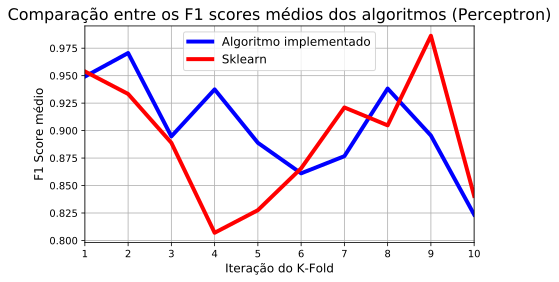

Média do F1 score médio do algoritmo implementado: 0.9036013353302066
Média do F1 score médio do Perceptron do Sklearn: 0.8929039384964416


In [20]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorF1Implementado, color="blue", linewidth=4, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorF1Sklearn, color="red", linewidth=4, label="Sklearn")
plt.title("Comparação entre os F1 scores médios dos algoritmos (Perceptron)")
plt.xlabel("Iteração do K-Fold")
plt.ylabel("F1 Score médio")
plt.xlim(1,qtdPacotesKFold)
plt.grid()
plt.legend()
plt.savefig('comparacaoPerceptronF1Score.eps', format='eps', bbox_inches='tight')
plt.show()

print("Média do F1 score médio do algoritmo implementado:", np.mean(vetorF1Implementado))
print("Média do F1 score médio do Perceptron do Sklearn:", np.mean(vetorF1Sklearn))

### Precisão

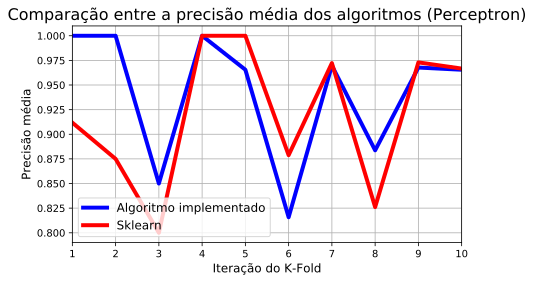

Média da precisão média do algoritmo implementado: 0.941798379185623
Média da precisão média do Sklearn: 0.9203501403053833


In [21]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorPrecisaoImplementado, color="blue", linewidth=4, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorPrecisaoSklearn, color="red", linewidth=4, label="Sklearn")
plt.title("Comparação entre a precisão média dos algoritmos (Perceptron)")
plt.xlabel("Iteração do K-Fold")
plt.ylabel("Precisão média")
plt.xlim(1,qtdPacotesKFold)
plt.grid()
plt.legend()
plt.savefig('comparacaoPerceptronPrecisao.eps', format='eps', bbox_inches='tight')
plt.show()

print("Média da precisão média do algoritmo implementado:", np.mean(vetorPrecisaoImplementado))
print("Média da precisão média do Sklearn:", np.mean(vetorPrecisaoSklearn))

### Recall

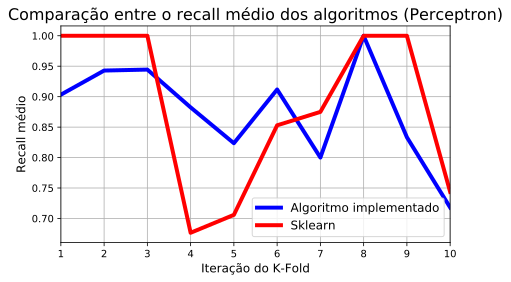

Média do recall médio do algoritmo implementado: 0.875945650385878
Média do recall médio do Sklearn: 0.8853883861236802


In [22]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorRecallImplementado, color="blue", linewidth=4, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorRecallSklearn, color="red", linewidth=4, label="Sklearn")
plt.title("Comparação entre o recall médio dos algoritmos (Perceptron)")
plt.xlabel("Iteração do K-Fold")
plt.ylabel("Recall médio")
plt.xlim(1,qtdPacotesKFold)
plt.grid()
plt.legend()
plt.savefig('comparacaoPerceptronRecall.eps', format='eps', bbox_inches='tight')
plt.show()

print("Média do recall médio do algoritmo implementado:", np.mean(vetorRecallImplementado))
print("Média do recall médio do Sklearn:", np.mean(vetorRecallSklearn))